# Linear Regression From Scratch


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = (20.0, 10.0)



In [6]:
data=pd.read_csv("headbrain.csv")

In [8]:
data.head(20)

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
5,1,1,3585,1300
6,1,1,3785,1400
7,1,1,3559,1255
8,1,1,3613,1355
9,1,1,3982,1375


In [14]:

data.shape

(237, 4)

In [46]:

X=data['Head Size(cm^3)'].values
Y=data['Brain Weight(grams)'].values

In [59]:
mean_x=np.mean(X)
mean_y=np.mean(Y)



m= len(X)



numer=0
denom=0

for i in range(m):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2

b1=numer/denom
b0 = mean_y - (b1 * mean_x)

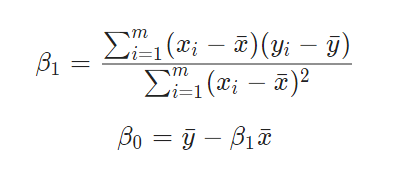

In [64]:
b1,b0

(0.26342933948939945, 325.57342104944223)

In [65]:
max_x = np.max(x) + 100

min_x=np.min(x)-100
max_x,min_x

(5047.0, 2420.0)

In [66]:
x=np.linspace(min_x,max_x,1000)
y=b0+b1*x

In [44]:
#Plotting

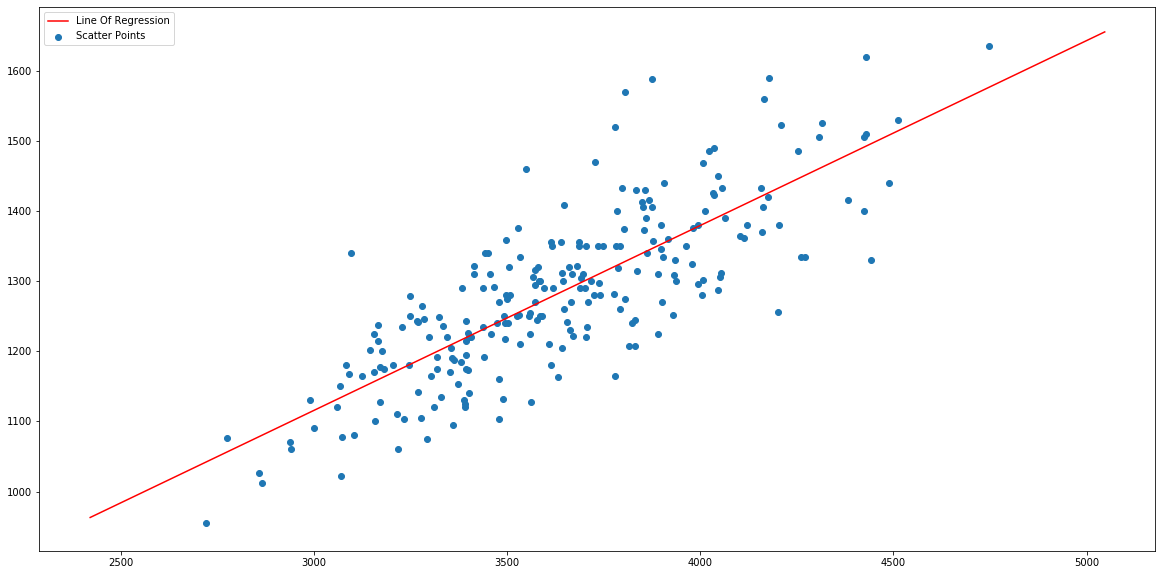

In [69]:
plt.plot(x,y,label='Line Of Regression',color='r')
#plotting scatter points
plt.scatter(X,Y,label='Scatter Points')
plt.legend()
plt.show()




In [72]:
#Now calculating root mean squared error



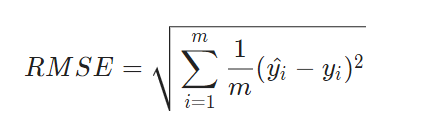

In [75]:
rmse=0
for i in range(m):
    y_pred=b0+b1*X[i]
    rmse+=(Y[i]-y_pred)**2
    
rmse=np.sqrt(rmse/m)  
rmse
    
    

72.1206213783709

In [76]:
#Now calculating R2 score


In [80]:
ss_t=0
ss_r=0
for i in range(m):
    y_pred=b0+b1*X[i]
    ss_t+=(Y[i]-mean_y)**2
    
    ss_r+=(Y[i]-y_pred)**2
    
r2=1-ss_r/ss_t
r2

0.6393117199570003

In [81]:
#This was my implimentation and now using sklearn trying the same.

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cannot use Rank 1 matrix in scikit learn
X = X.reshape((m, 1))
# Creating Model
reg = LinearRegression()
# Fitting training data
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)

# Calculating RMSE and R2 Score
mse = mean_squared_error(Y, Y_pred)
rmse_sk = np.sqrt(mse)
r2_score = reg.score(X, Y)

print(np.sqrt(mse))
print(r2_score)

72.1206213783709
0.639311719957


In [95]:

print("scratch model stats:"  , rmse , r2)
print("sklearn model stats" ,rmse_sk ,r2_score)


scratch model stats: 72.1206213783709 0.6393117199570003
sklearn model stats 72.1206213783709 0.639311719957


# Same Scores but fewer Lines of Code with Sklearn 😍 ..